In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('D:\\projetos\\roadSafeAi\\RoadSafeAI\\files\\processed\\datatran_merged_base_2007_2024.csv', sep=";")
print(f"Dimensões do dataset: {df.shape}")

Dimensões do dataset: (2122296, 25)


In [6]:
print("Tipos de dados das colunas:")
print(df.dtypes)

Tipos de dados das colunas:
id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
dtype: object


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122296 entries, 0 to 2122295
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      float64
 6   km                      float64
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  

In [ ]:
# Convertendo colunas de datas e horários
df['data_inversa'] = pd.to_datetime(df['data_inversa'])
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.time


In [11]:
print("Tipos de dados das colunas:")
print(df.dtypes)

Tipos de dados das colunas:
id                               float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                               float64
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int32
mortos                             int32
feridos_leves                      int32
feridos_graves                     int32
ilesos                             int32
ignorados                          int32
feridos                      

In [12]:
# Verificar se o total de pessoas corresponde à soma das categorias
df['total_calculado'] = df['mortos'] + df['feridos_leves'] + df['feridos_graves'] + df['ilesos'] + df['ignorados']
inconsistencias = df[df['pessoas'] != df['total_calculado']]
print(f"Número de registros com inconsistências no total de pessoas: {len(inconsistencias)}")

Número de registros com inconsistências no total de pessoas: 29340


In [16]:
# Verificar valores nulos, vazios e espaços em branco
def analisar_nulos(df):

    nulos = df.isnull().sum()
    
    vazios = df.astype(str).apply(lambda x: (x.str.strip() == '').sum())
    
    espacos = df.astype(str).apply(lambda x: (x.str.strip().str.isspace().fillna(False)).sum())
    
    resultado = pd.DataFrame({
        'Valores Nulos': nulos,
        'Strings Vazias': vazios,
        'Apenas Espaços': espacos,
        'Percentual(%)': (nulos + vazios + espacos) / len(df) * 100
    })
    
    return resultado.sort_values('Percentual(%)', ascending=False)

In [17]:
resultado = analisar_nulos(df)
resultado

                        Valores Nulos  Strings Vazias  Apenas Espaços  \
tipo_acidente                      41               0               0   
br                                 12               0               0   
km                                 12               0               0   
classificacao_acidente              6               0               0   
condicao_metereologica              3               0               0   
fase_dia                            1               0               0   
uso_solo                            0               0               0   
veiculos                            0               0               0   
feridos                             0               0               0   
ignorados                           0               0               0   
ilesos                              0               0               0   
feridos_graves                      0               0               0   
feridos_leves                       0              

In [21]:
colunas_com_nulos = ['tipo_acidente', 'br', 'km', 'classificacao_acidente', 
                     'condicao_metereologica', 'fase_dia']

# Filtrar o dataframe para mostrar apenas linhas com nulos nestas colunas
linhas_com_nulos = df[df[colunas_com_nulos].isnull().any(axis=1)]

# Exibir o resultado
print(f"Total de linhas com valores nulos: {len(linhas_com_nulos)}")

Total de linhas com valores nulos: 63


In [29]:
linhas_com_nulos.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,total_calculado
2446,261456.0,2007-01-08,Quarta,13:00:00,(null),NaN,NaN,GUARANTA DO NORTE,Outras,Colisão Transversal,Com Vítimas Feridas,Pleno dia,Crescente,Ceu Claro,Simples,Curva,Rural,2,0,2,0,0,0,2,2,2
35995,217981.0,2007-04-18,Quarta,17:00:00,(null),NaN,NaN,TERRA NOVA DO NORTE,Outras,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Ceu Claro,Simples,Reta,Rural,6,2,0,2,2,0,2,2,6
72196,260039.0,2007-07-30,Segunda,19:30:00,(null),NaN,NaN,MATUPA,Ingestão de álcool,Colisão frontal,Com Vítimas Fatais,Plena noite,Decrescente,Ceu Claro,Simples,Reta,Rural,3,1,0,1,1,0,1,2,3
74618,238324.0,2007-08-06,Sexta,07:40:00,(null),NaN,NaN,GUARANTA DO NORTE,Ultrapassagem indevida,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Ceu Claro,Simples,Reta,Urbano,2,0,1,1,0,0,2,2,2
89763,280321.0,2007-09-20,Quinta,19:30:00,(null),NaN,NaN,MATUPA,Animais na Pista,Atropelamento de animal,Com Vítimas Feridas,Plena noite,Decrescente,Ceu Claro,Simples,Reta,Rural,2,0,1,0,0,1,1,1,2


In [31]:
def tratar_nulos_seletivamente(df):
    # Criar uma cópia do dataframe para não modificar o original
    df_tratado = df.copy()
    
    # 1. Identificar linhas que têm nulos apenas em tipo_acidente
    apenas_tipo_acidente_nulo = df_tratado[
        (df_tratado['tipo_acidente'].isnull()) & 
        (~df_tratado.drop('tipo_acidente', axis=1).isnull().any(axis=1))
    ]
    
    # 2. Preencher tipo_acidente como "Não informado" apenas nestas linhas
    df_tratado.loc[apenas_tipo_acidente_nulo.index, 'tipo_acidente'] = 'Não informado'
    
    # 3. Remover linhas que têm nulos em outros campos
    df_tratado = df_tratado.dropna()
    
    # 4. Exibir informações sobre o tratamento
    print(f"Linhas onde apenas tipo_acidente era nulo: {len(apenas_tipo_acidente_nulo)}")
    print(f"Registros no dataset original: {len(df)}")
    print(f"Registros após tratamento: {len(df_tratado)}")
    print(f"Registros removidos: {len(df) - len(df_tratado)}")
    
    return df_tratado

# Aplicar o tratamento
df_limpo = tratar_nulos_seletivamente(df)

Linhas onde apenas tipo_acidente era nulo: 41
Registros no dataset original: 2122296
Registros após tratamento: 2122274
Registros removidos: 22


In [35]:
resultado = analisar_nulos(df_limpo)
resultado

,Valores Nulos,Strings Vazias,Apenas Espaços,Percentual(%)
id,0,0,0,0.0
data_inversa,0,0,0,0.0
veiculos,0,0,0,0.0
feridos,0,0,0,0.0
ignorados,0,0,0,0.0
ilesos,0,0,0,0.0
feridos_graves,0,0,0,0.0
feridos_leves,0,0,0,0.0
mortos,0,0,0,0.0
pessoas,0,0,0,0.0


## Verificando outliers

In [52]:
# [Célula 1] - Análise de outliers com colunas específicas
def identificar_outliers_acidentes(df):
    # Definir colunas específicas para análise
    colunas_alvo = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 
                    'ilesos', 'ignorados', 'feridos', 'veiculos']
    
    resultados = {}
    for coluna in colunas_alvo:
        # Calcular quartis e IQR
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir limites
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
        
        resultados[coluna] = {
            'total_outliers': len(outliers),
            'percentual_outliers': (len(outliers) / len(df)) * 100,
            'limite_inferior': limite_inferior,
            'limite_superior': limite_superior,
            'min': df[coluna].min(),
            'max': df[coluna].max(),
            'media': df[coluna].mean(),
            'mediana': df[coluna].median()
        }
    
    return pd.DataFrame(resultados).T

# Executar análise
resultado_outliers = identificar_outliers_acidentes(df)
print("Análise de Outliers:")
resultado_outliers

Análise de Outliers:


,total_outliers,percentual_outliers,limite_inferior,limite_superior,min,max,media,mediana
pessoas,29829.0,1.405506,-2.0,6.0,1.0,248.0,2.253660,2.0
mortos,101074.0,4.762484,0.0,0.0,0.0,37.0,0.057322,0.0
feridos_leves,67019.0,3.157854,-1.5,2.5,0.0,61.0,0.551835,0.0
feridos_graves,314427.0,14.815417,0.0,0.0,0.0,222.0,0.190318,0.0
ilesos,66979.0,3.155969,-0.5,3.5,0.0,99.0,1.313175,1.0
ignorados,268670.0,12.659403,0.0,0.0,0.0,88.0,0.162082,0.0
feridos,104642.0,4.930603,-1.5,2.5,0.0,239.0,0.742153,0.0
veiculos,70378.0,3.316126,-0.5,3.5,1.0,131.0,1.800320,2.0


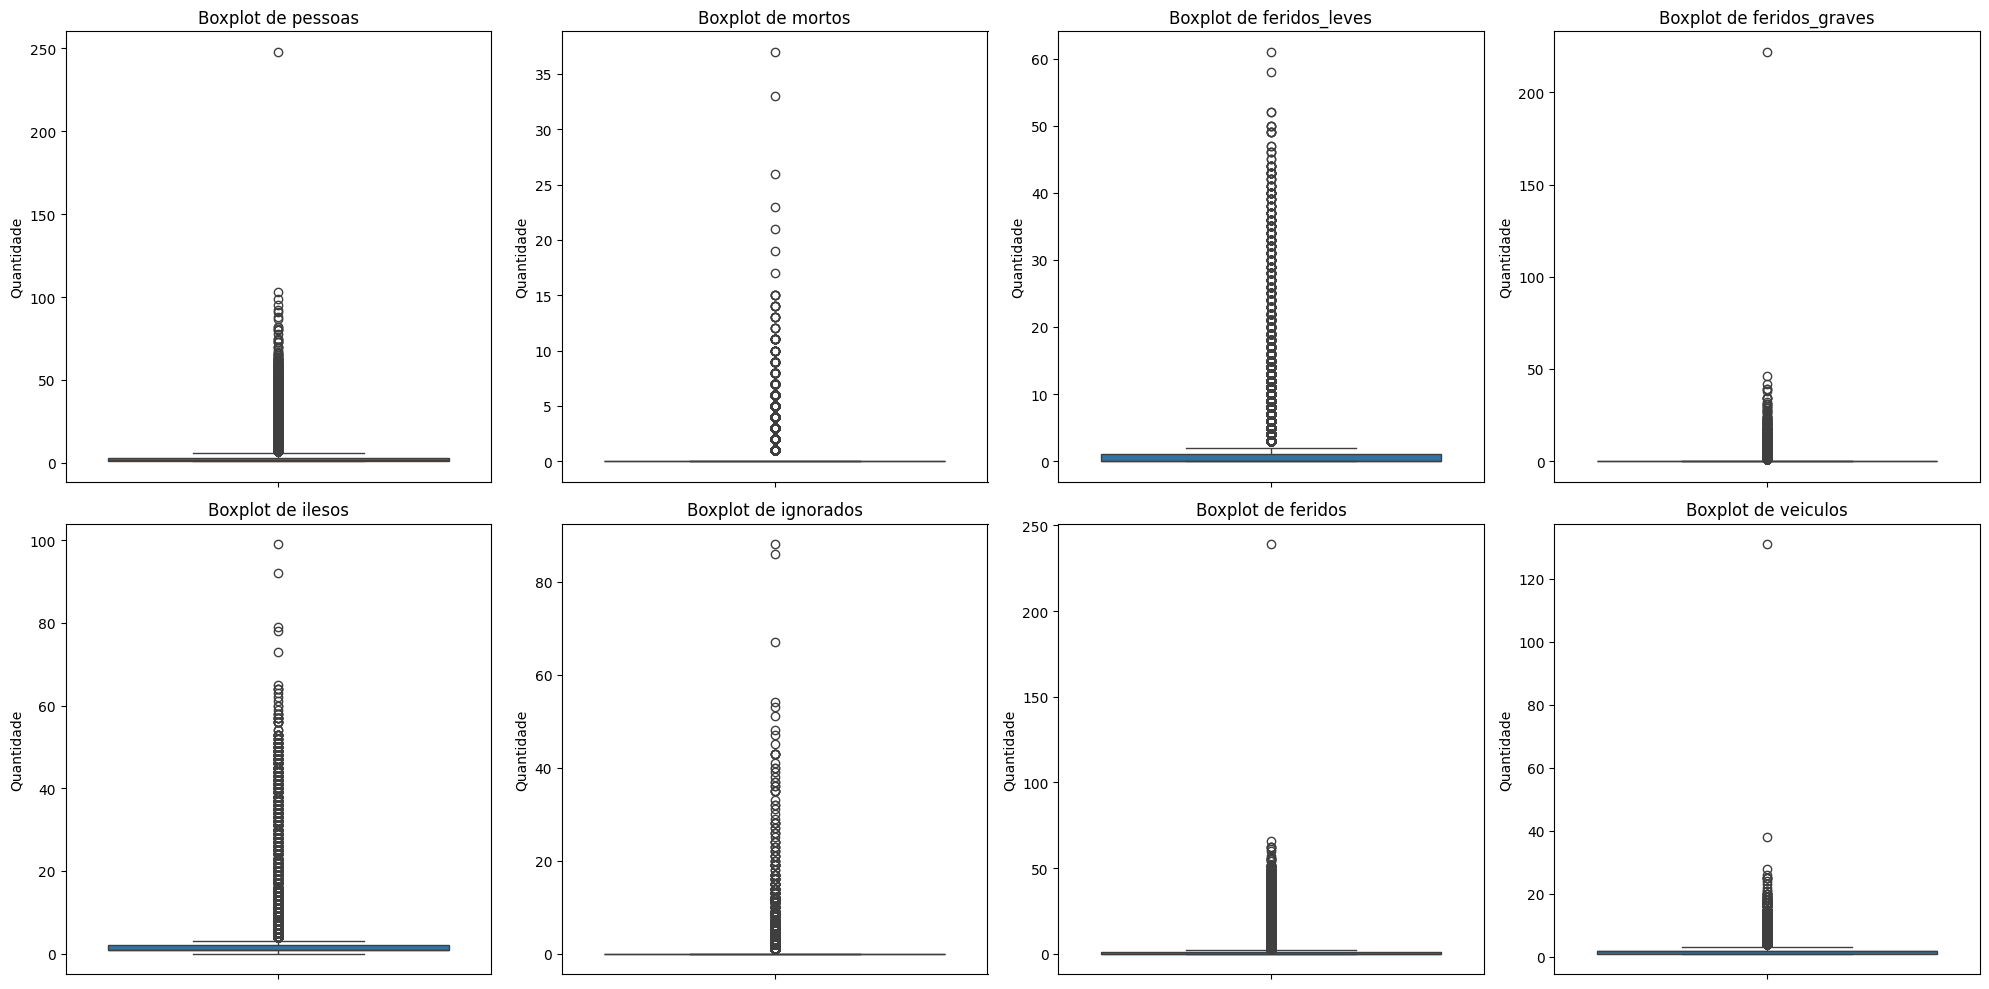

In [47]:
def plotar_boxplots_acidentes(df):
    colunas_alvo = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 
                    'ilesos', 'ignorados', 'feridos', 'veiculos']
    
    # Criar subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, coluna in enumerate(colunas_alvo):
        sns.boxplot(data=df, y=coluna, ax=axes[idx])
        axes[idx].set_title(f'Boxplot de {coluna}')
        axes[idx].set_ylabel('Quantidade')
    
    plt.tight_layout()
    plt.show()

# Executar visualização
plotar_boxplots_acidentes(df)

In [48]:
# [Célula 3] - Análise detalhada dos casos extremos
def analisar_casos_extremos(df):
    colunas_alvo = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 
                    'ilesos', 'ignorados', 'feridos', 'veiculos']
    
    for coluna in colunas_alvo:
        # Calcular limites usando método IQR
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        
        # Filtrar casos extremos
        casos_extremos = df[df[coluna] > limite_superior]
        
        print(f"\nAnálise de casos extremos para {coluna}:")
        print(f"Número de casos extremos: {len(casos_extremos)}")
        print(f"Valor máximo encontrado: {casos_extremos[coluna].max()}")
        print(f"Limite superior considerado: {limite_superior}")
        
        if len(casos_extremos) > 0:
            print("\nExemplo de caso extremo:")
            exemplo = casos_extremos.iloc[0]
            print(f"- Tipo de acidente: {exemplo['tipo_acidente']}")
            print(f"- Causa do acidente: {exemplo['causa_acidente']}")
            print(f"- UF: {exemplo['uf']}")
            print(f"- Classificação: {exemplo['classificacao_acidente']}")

# Executar análise detalhada
analisar_casos_extremos(df)


Análise de casos extremos para pessoas:
Número de casos extremos: 29829
Valor máximo encontrado: 248
Limite superior considerado: 6.0

Exemplo de caso extremo:
- Tipo de acidente: Colisão frontal
- Causa do acidente: Falta de atenção
- UF: MG
- Classificação: Com Vítimas Feridas

Análise de casos extremos para mortos:
Número de casos extremos: 101074
Valor máximo encontrado: 37
Limite superior considerado: 0.0

Exemplo de caso extremo:
- Tipo de acidente: Atropelamento de pessoa
- Causa do acidente: Outras
- UF: PR
- Classificação: Com Vítimas Fatais

Análise de casos extremos para feridos_leves:
Número de casos extremos: 67019
Valor máximo encontrado: 61
Limite superior considerado: 2.5

Exemplo de caso extremo:
- Tipo de acidente: Saída de Pista
- Causa do acidente: Outras
- UF: MG
- Classificação: Com Vítimas Feridas

Análise de casos extremos para feridos_graves:
Número de casos extremos: 314427
Valor máximo encontrado: 222
Limite superior considerado: 0.0

Exemplo de caso extremo

In [49]:
# [Célula 4] - Verificação de consistência dos dados
def verificar_consistencia_dados(df):
    # Verificar se o total de pessoas corresponde à soma das categorias
    df['soma_categorias'] = df['mortos'] + df['feridos_leves'] + \
                           df['feridos_graves'] + df['ilesos'] + df['ignorados']
    
    inconsistencias = df[df['pessoas'] != df['soma_categorias']]
    
    print(f"\nVerificação de consistência:")
    print(f"Total de registros inconsistentes: {len(inconsistencias)}")
    
    if len(inconsistencias) > 0:
        print("\nExemplos de inconsistências:")
        print(inconsistencias[['pessoas', 'mortos', 'feridos_leves', 
                             'feridos_graves', 'ilesos', 'ignorados', 
                             'soma_categorias']].head())

# Executar verificação de consistência
verificar_consistencia_dados(df)


Verificação de consistência:
Total de registros inconsistentes: 29340

Exemplos de inconsistências:
       pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  \
12732        3       0              0               0       2          0   
34543        2       0              0               0       1          0   
37908        2       0              1               0       0          0   
42210        1       0              0               0       0          0   
45846        2       0              1               0       0          0   

       soma_categorias  
12732                2  
34543                1  
37908                1  
42210                0  
45846                1  


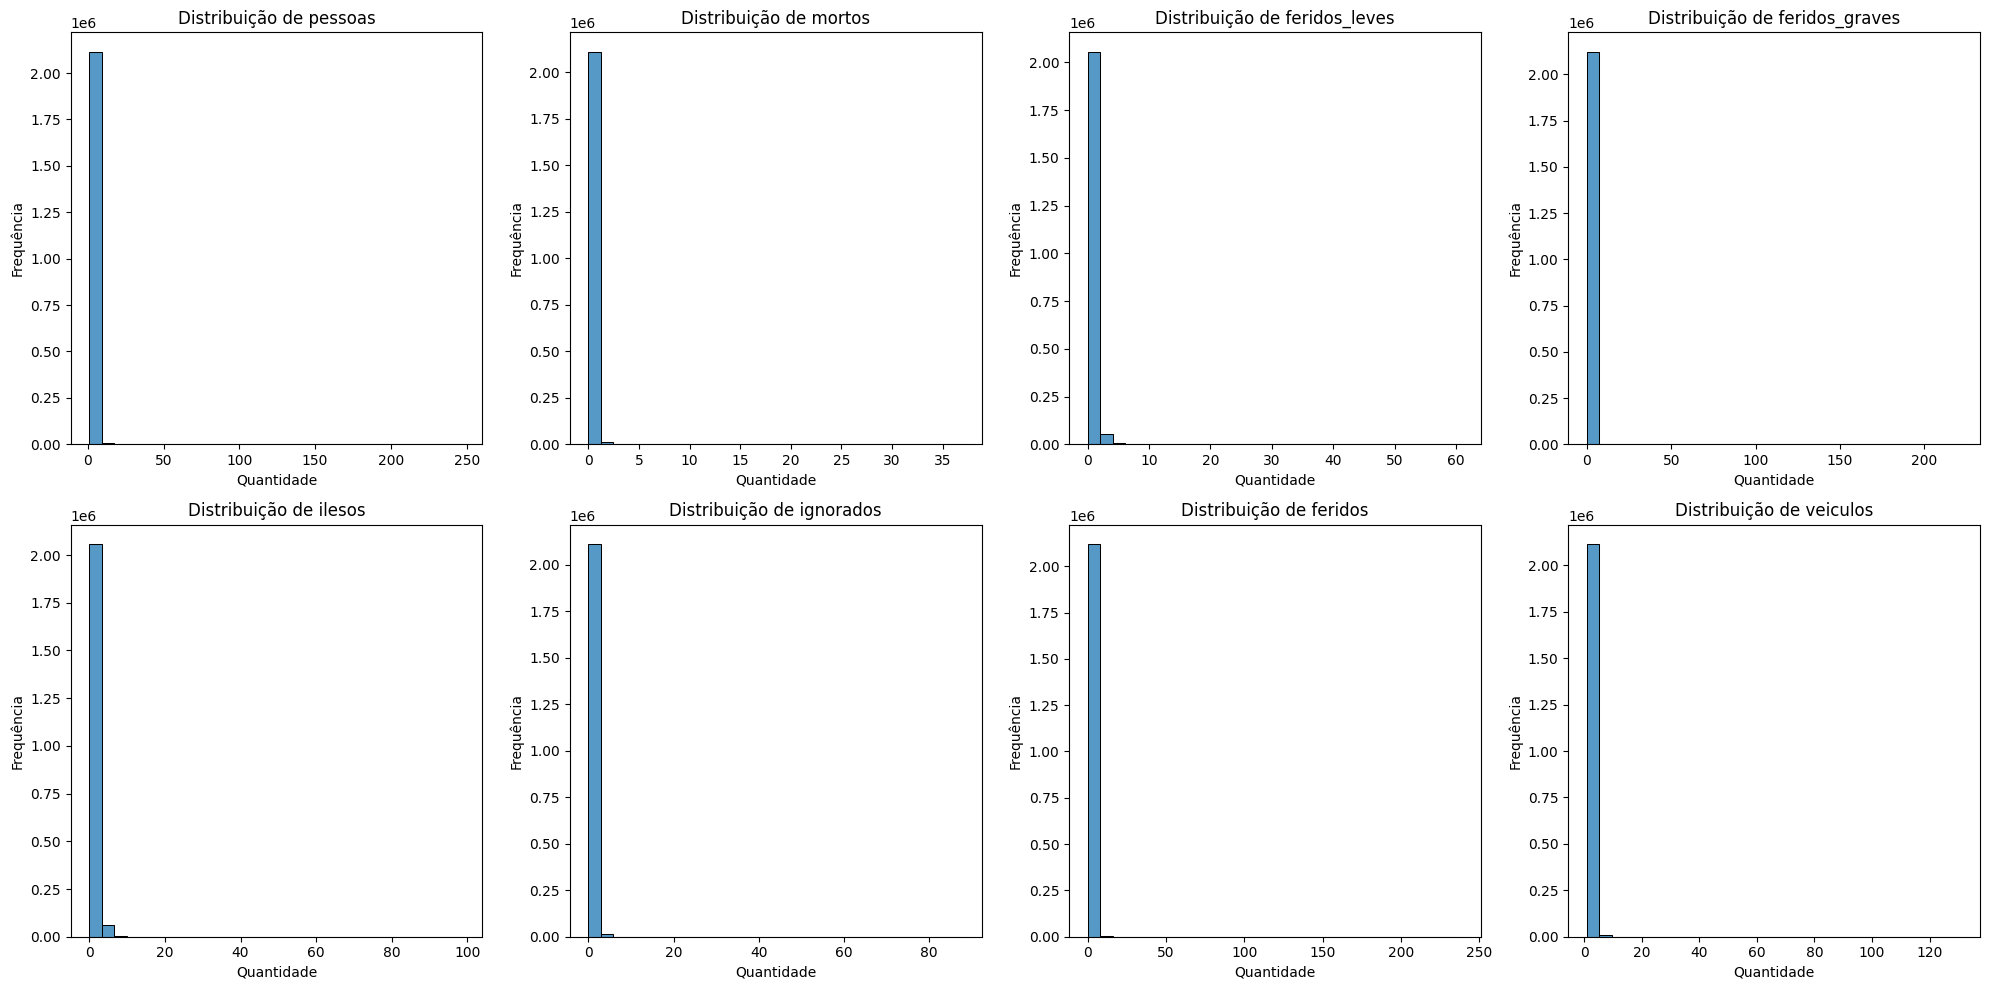

In [50]:
# [Célula 5] - Histogramas para análise de distribuição
def plotar_distribuicoes_acidentes(df):
    colunas_alvo = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 
                    'ilesos', 'ignorados', 'feridos', 'veiculos']
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, coluna in enumerate(colunas_alvo):
        sns.histplot(data=df, x=coluna, ax=axes[idx], bins=30)
        axes[idx].set_title(f'Distribuição de {coluna}')
        axes[idx].set_xlabel('Quantidade')
        axes[idx].set_ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()

# Executar análise de distribuição
plotar_distribuicoes_acidentes(df)

In [51]:
def analisar_outliers_relacionais(df):
    # Criar matriz de correlação para variáveis numéricas
    corr = df.select_dtypes(include=[np.number]).corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlação')
    plt.show()
    
    # Scatter plots para pares de variáveis altamente correlacionadas
    pares_correlacionados = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > 0.5:
                pares_correlacionados.append((corr.columns[i], corr.columns[j]))
    
    for var1, var2 in pares_correlacionados:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=var1, y=var2)
        plt.title(f'Relação entre {var1} e {var2}')
        plt.show()

In [44]:
# Identificar outliers usando o método IQR
outliers_iqr = identificar_outliers_numericos(df)
print("Outliers identificados pelo método IQR:")
outliers_iqr

Outliers identificados pelo método IQR:


,total_outliers,percentual_outliers,limite_inferior,limite_superior,min,max
id,471222.0,22.203406,-936816.00,2605162.00,8.0,83529889.0
br,16.0,0.000754,-233.50,658.50,0.0,958.0
km,14787.0,0.696745,-420.85,911.55,-870.3,9967.1
pessoas,29829.0,1.405506,-2.00,6.00,1.0,248.0
mortos,101074.0,4.762484,0.00,0.00,0.0,37.0
feridos_leves,67019.0,3.157854,-1.50,2.50,0.0,61.0
feridos_graves,314427.0,14.815417,0.00,0.00,0.0,222.0
ilesos,66979.0,3.155969,-0.50,3.50,0.0,99.0
ignorados,268670.0,12.659403,0.00,0.00,0.0,88.0
feridos,104642.0,4.930603,-1.50,2.50,0.0,239.0


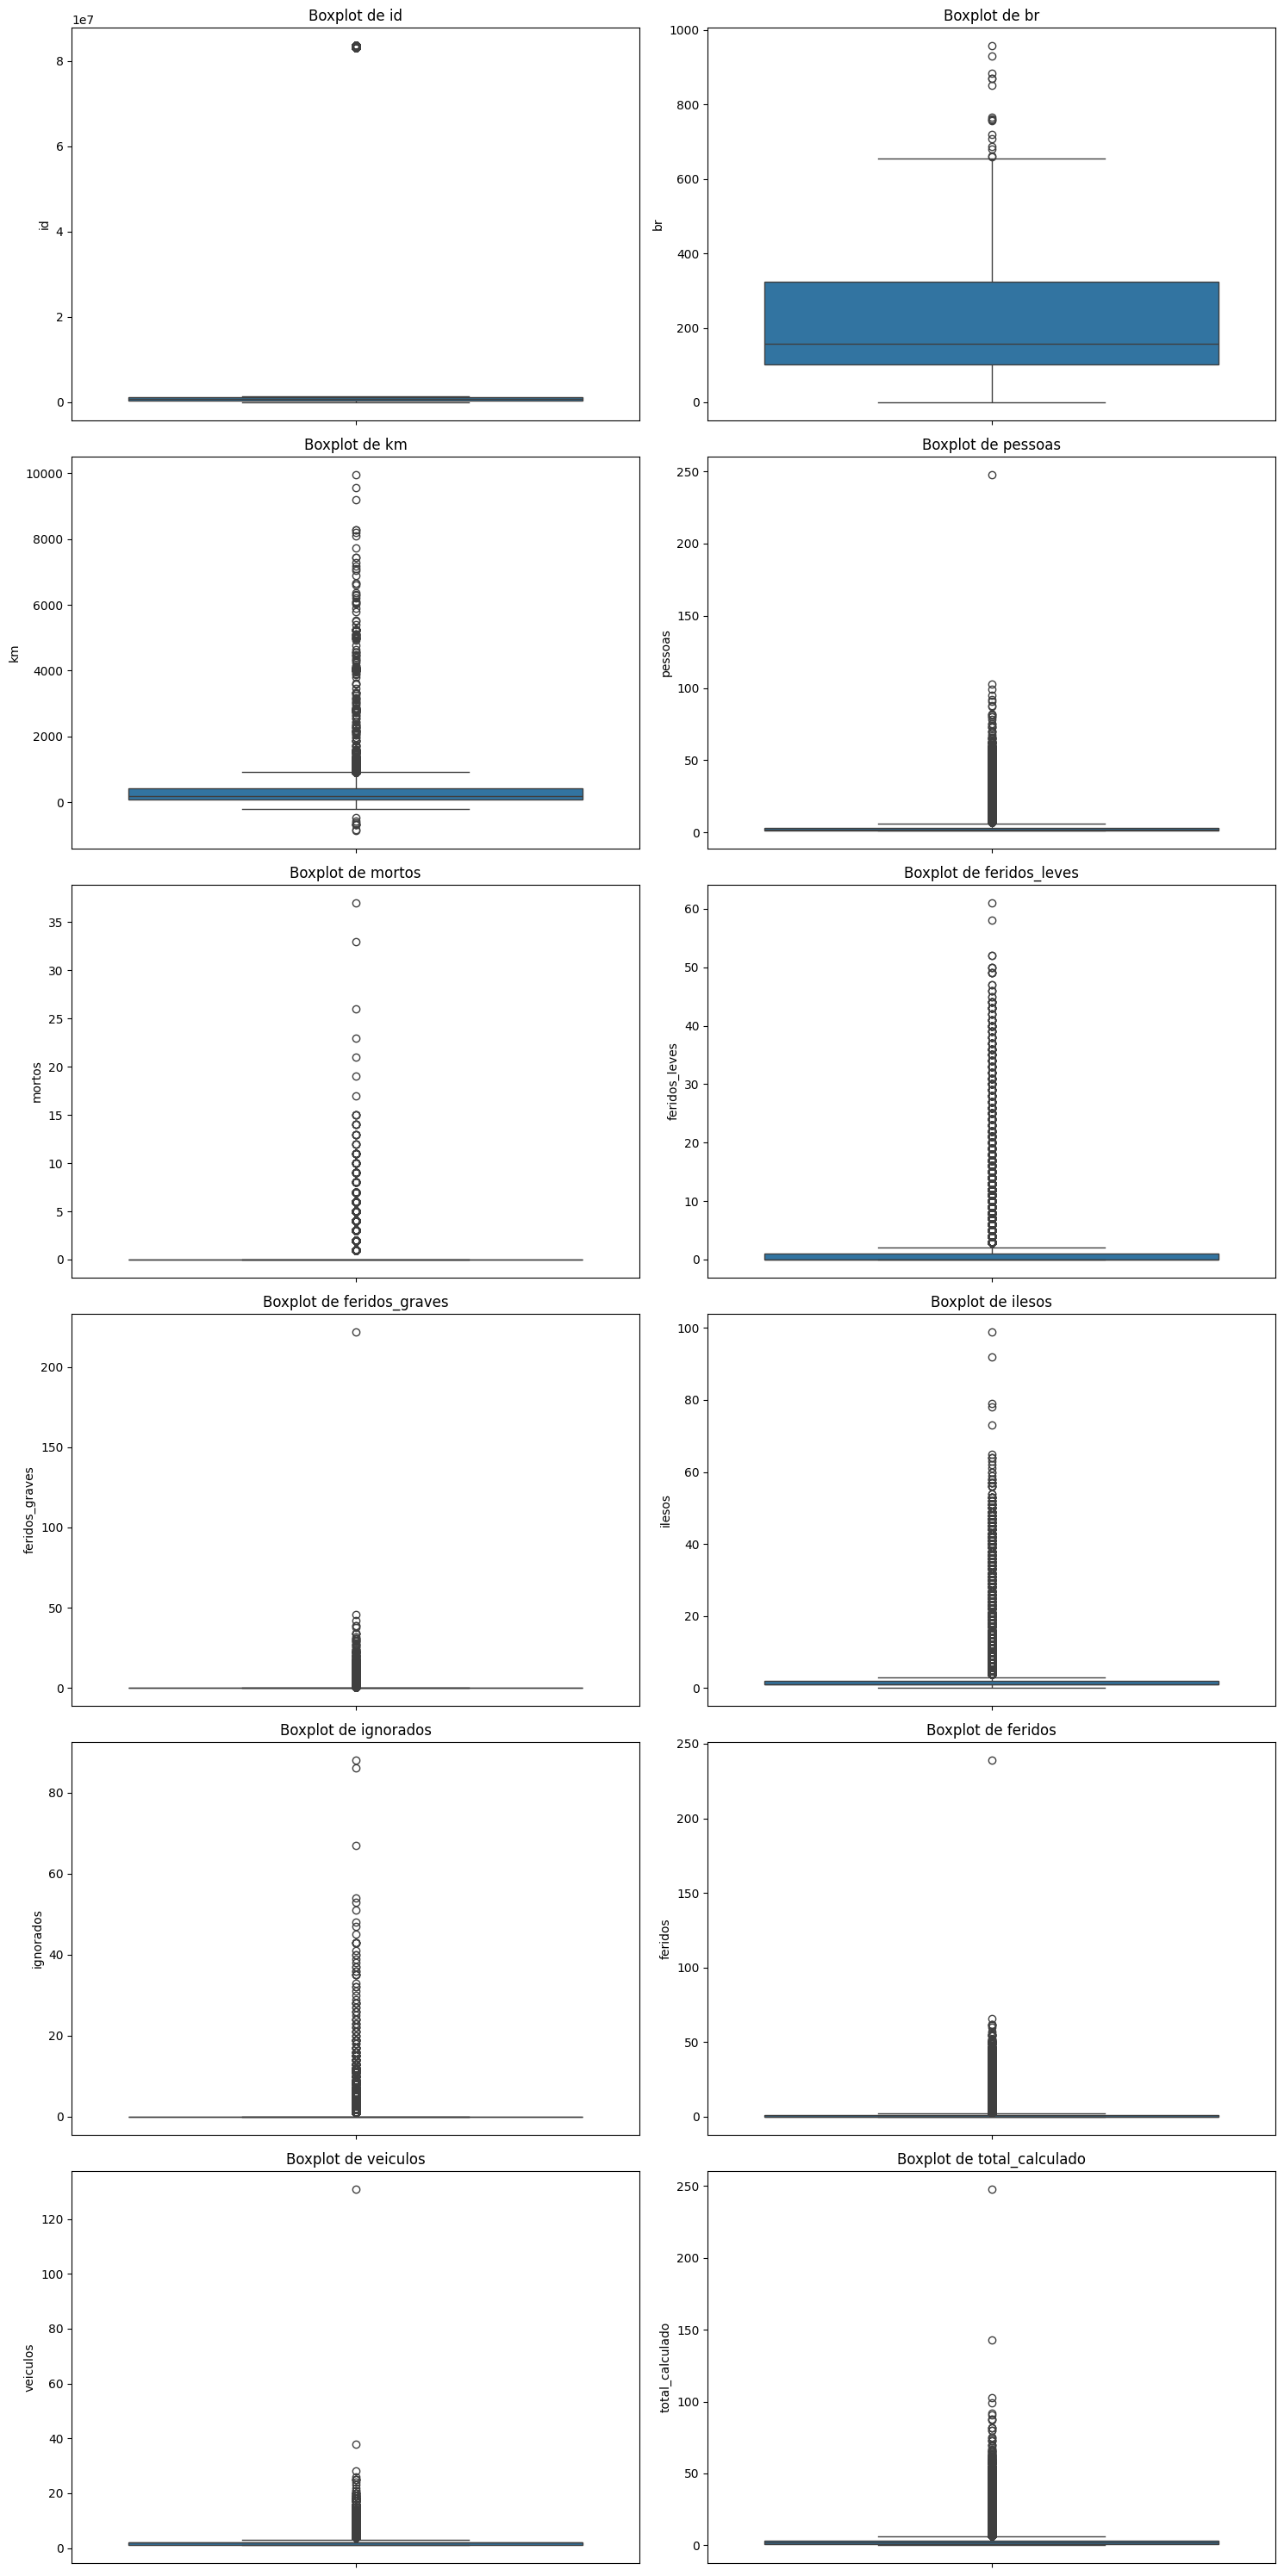

In [45]:
# Plotar boxplots
plotar_boxplots(df)

In [ ]:
# Identificar outliers usando Z-Score
outliers_zscore = identificar_outliers_zscore(df)
print("\nOutliers identificados pelo método Z-Score:")
outliers_zscore

In [ ]:
# Análise contextual
analisar_outliers_contextuais(df)

In [ ]:
# Visualizar distribuições
plotar_distribuicoes(df)

In [ ]:
# Análise relacional
analisar_outliers_relacionais(df)